<div class = "alert alert-warning" style="color:black"> <h2>Activity 3.4: examining the effect of having less data.</h2>
<p>The code in the cell below has a loop which trains a newtwork with different amounts of training data, and reports the training and test accuracy for each run. </p>
<p>  Run the cell below and make note of the train and test accuracy for each different sized training data.</p>
 <h4>   Make a hypothesis that explains the  patterns of changing training and test scores you see, and be ready to discuss this in class.</h4></div>

In [1]:
# basics for manipulating and outputting arrays etc
import warnings

import matplotlib.pyplot as plt
import numpy as np

## MLP specific stuff
from sklearn.neural_network import MLPClassifier
import VisualiseNN as VisNN

# useful sklearn functions for preprocessing data and showing results
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

%matplotlib inline

In [2]:

num_hidden_nodes = 3   # <== change this to configure the architecture
# Create Multi-Layer Perceptron with one hidden layer of num_hidden_nodes neurons with logistic activation
# and Stochastic Gradient Descent (backprop)
xorMLP = MLPClassifier(
    hidden_layer_sizes=(num_hidden_nodes,),
    max_iter=1000,
    alpha=1e-4,
    solver="sgd",
    #verbose=0,
    learning_rate_init=0.1,
    #random_state=None
)

In [3]:
# Find directory holding data depending on what machine you are on
import socket
import numpy as np
if (socket.gethostname()=='csctcloud'): # on csctcloud
    datapath = "/home/common/datasets"
else:  # you will need to change this if you are using data on your local machine
    datapath = "D:/The British College/Second Year AI/2nd Semester/Artificial Intelligence/University course materials/Learning_Materials/common/datasets/"


In [4]:
### Only  Run this cell if you are using the ccstcloud server
# example code to run on the server using a copy of the data that I have already downloaded and made available.
# label is column 0
# pixel values are from 0-255 so need to be scaled to 0-1

test = np.genfromtxt(datapath + "mnist_test.csv", delimiter=",")
X_test = test[1:, 1:785] / 255
y_test = test[1:, 0]

train = np.genfromtxt(datapath + "mnist_train.csv", delimiter=",")
X_train = train[1:, 1:785] / 255
y_train = train[1:, 0]

print(
    f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns, y_train has {y_train.shape} entries"
    f"X_test has shape {X_test.shape} y_test has {len(y_test)} entries."
)

X_train has 59999 rows and 784 columns, y_train has (59999,) entriesX_test has shape (9999, 784) y_test has 9999 entries.


In [7]:
from approvedimports import *

for trSetSize in (100, 600, 1000, 6000, 10000, 50000):
    split = trSetSize / 60000
    _, X_train_small, _, y_train_small = train_test_split(
        X_train, y_train, test_size=split, stratify=y_train
    )
    smallMnistMLP = MLPClassifier(
        hidden_layer_sizes=(16),
        max_iter=25,
        alpha=1e-4,
        solver="sgd",
        verbose=0,
        random_state=10,
        learning_rate_init=0.1,
    )

    # put a loop of n runs here

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        smallMnistMLP.fit(X_train_small, y_train_small)
    print(f"With a training set of {trSetSize} examples")
    print(
        f"    Training set accuracy: {100*smallMnistMLP.score(X_train_small, y_train_small)}%"
    )
    print(f"    Test set accuracy: {100*smallMnistMLP.score(X_test, y_test)}%")

With a training set of 100 examples
    Training set accuracy: 100.0%
    Test set accuracy: 72.6972697269727%
With a training set of 600 examples
    Training set accuracy: 99.83333333333333%
    Test set accuracy: 86.62866286628663%
With a training set of 1000 examples
    Training set accuracy: 99.8%
    Test set accuracy: 87.5087508750875%
With a training set of 6000 examples
    Training set accuracy: 99.45%
    Test set accuracy: 91.51915191519151%
With a training set of 10000 examples
    Training set accuracy: 98.71%
    Test set accuracy: 93.16931693169317%
With a training set of 50000 examples
    Training set accuracy: 96.994%
    Test set accuracy: 95.2995299529953%


<div class = "alert alert-warning" style="color:black"><h2> (Stretch) Activity 3.5: Gathering evidence for your hypothesis.</h2>
<ol>
    <li> Copy and paste the code from the previous cell into the cell below. </li>
    <li> <b>Edit</b> the code by: <ul>
        <li> Adding an array called results with 4 columns and 30 rows, initialised to zero (hint: np,zeros). </li>
        <li> Adding a loop so that it runs the experiment for each training set size  5 times.</li>
        <li> saving the training and test accuracy from each run into a seperate row in your new  array.</li>
        <li> Store the training set size in results column 0, run number in column 1, training accuracy in column 2 and test accuracy in column 3.</li>
     </ul>
    <li> Use matplotlib to make a plot with training set size on the x-axis and accuracy on the y-axis</li>
        <li> Plot your results as two different lines on your plot, with error bars for each.</li>
        </ol>
        <p> <b>  HINT: google is good to find code snippets to make plots with.</b></p.</div>

X_train has 59999 rows and 784 columns, y_train has (59999,) entriesX_test has shape (9999, 784) y_test has 9999 entries.
Training set size: 100, Run 1/5
    Training accuracy: 99.0%
    Test accuracy: 65.1965196519652%
Training set size: 100, Run 2/5
    Training accuracy: 100.0%
    Test accuracy: 70.73707370737074%
Training set size: 100, Run 3/5
    Training accuracy: 100.0%
    Test accuracy: 71.987198719872%
Training set size: 100, Run 4/5
    Training accuracy: 100.0%
    Test accuracy: 68.006800680068%
Training set size: 100, Run 5/5
    Training accuracy: 100.0%
    Test accuracy: 66.25662566256626%
Training set size: 600, Run 1/5
    Training accuracy: 99.83333333333333%
    Test accuracy: 84.85848584858486%
Training set size: 600, Run 2/5
    Training accuracy: 100.0%
    Test accuracy: 86.96869686968697%
Training set size: 600, Run 3/5
    Training accuracy: 100.0%
    Test accuracy: 86.37863786378638%
Training set size: 600, Run 4/5
    Training accuracy: 100.0%
    Test a

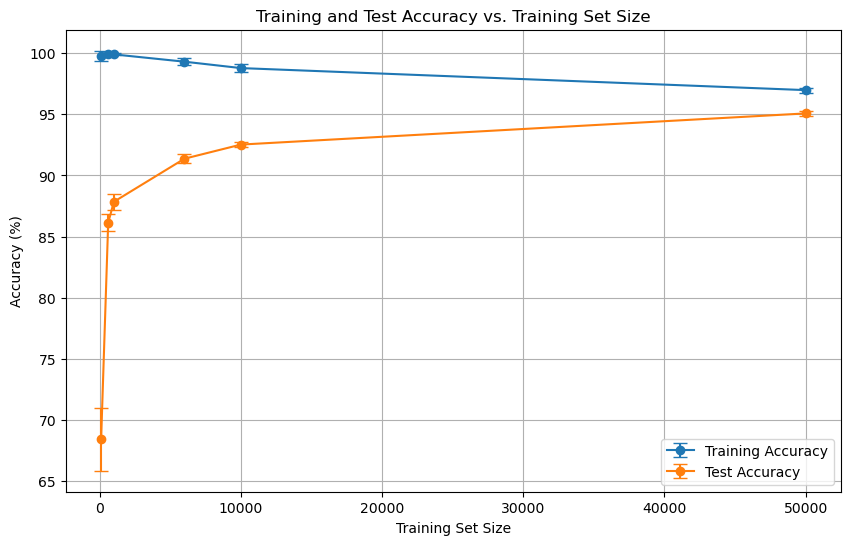

In [9]:
from approvedimports import *

# Find directory holding data depending on what machine you are on
import socket
import numpy as np
if (socket.gethostname()=='csctcloud'): # on csctcloud
    datapath = "/home/common/datasets"
else:  # you will need to change this if you are using data on your local machine
    datapath = "D:/The British College/Second Year AI/2nd Semester/Artificial Intelligence/University course materials/Learning_Materials/common/datasets/"

# Load MNIST data
test = np.genfromtxt(datapath + "mnist_test.csv", delimiter=",")
X_test = test[1:, 1:785] / 255
y_test = test[1:, 0]

train = np.genfromtxt(datapath + "mnist_train.csv", delimiter=",")
X_train = train[1:, 1:785] / 255
y_train = train[1:, 0]

print(
    f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns, y_train has {y_train.shape} entries"
    f"X_test has shape {X_test.shape} y_test has {len(y_test)} entries."
)

# Initialize results array: 30 rows (6 sizes x 5 runs), 4 columns (size, run, train_acc, test_acc)
results = np.zeros((30, 4))

# Counter for results array row index
row_idx = 0

# Training set sizes
trSetSizes = [100, 600, 1000, 6000, 10000, 50000]

# Run experiment 5 times for each training set size
for trSetSize in trSetSizes:
    split = trSetSize / 60000
    for run in range(5):
        # Split the training data
        _, X_train_small, _, y_train_small = train_test_split(
            X_train, y_train, test_size=split, stratify=y_train, random_state=run
        )
        
        # Create and train the MLP
        smallMnistMLP = MLPClassifier(
            hidden_layer_sizes=(16,),
            max_iter=25,
            alpha=1e-4,
            solver="sgd",
            verbose=0,
            random_state=10,
            learning_rate_init=0.1,
        )

        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
            smallMnistMLP.fit(X_train_small, y_train_small)
        
        # Compute accuracies
        train_acc = 100 * smallMnistMLP.score(X_train_small, y_train_small)
        test_acc = 100 * smallMnistMLP.score(X_test, y_test)
        
        # Store results
        results[row_idx, 0] = trSetSize  # Training set size
        results[row_idx, 1] = run        # Run number
        results[row_idx, 2] = train_acc  # Training accuracy
        results[row_idx, 3] = test_acc   # Test accuracy
        
        print(f"Training set size: {trSetSize}, Run {run+1}/5")
        print(f"    Training accuracy: {train_acc}%")
        print(f"    Test accuracy: {test_acc}%")
        
        row_idx += 1

# Compute mean and standard deviation for each training set size
mean_train_acc = np.zeros(len(trSetSizes))
std_train_acc = np.zeros(len(trSetSizes))
mean_test_acc = np.zeros(len(trSetSizes))
std_test_acc = np.zeros(len(trSetSizes))

for i, trSetSize in enumerate(trSetSizes):
    # Select rows for this training set size
    mask = results[:, 0] == trSetSize
    mean_train_acc[i] = np.mean(results[mask, 2])
    std_train_acc[i] = np.std(results[mask, 2])
    mean_test_acc[i] = np.mean(results[mask, 3])
    std_test_acc[i] = np.std(results[mask, 3])

# Plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(trSetSizes, mean_train_acc, yerr=std_train_acc, label="Training Accuracy", fmt='-o', capsize=5)
plt.errorbar(trSetSizes, mean_test_acc, yerr=std_test_acc, label="Test Accuracy", fmt='-o', capsize=5)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy (%)")
plt.title("Training and Test Accuracy vs. Training Set Size")
plt.legend()
plt.grid(True)
plt.show()